### 1. Exploratory Data Analysis

#### 1.1 Set-up Packages and Load Dataset

In [3]:
# Set matplotlib backend to inline
%matplotlib inline 

In [382]:
# Import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets 
import random

In [5]:
#import dataset
wine=datasets.load_wine()

### 1.2 Understanding the Data

In [6]:
# Print the feature names
print(wine.feature_names)

# Print the target names
print(wine.target_names)

# Print the first 5 samples of the data
print(wine.data[:5])

# Print the first 5 labels of the data
print(wine.target[:5])

# Print the number of samples and features
print(wine.data.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]
(178, 13)


### 1.3 Visualising the data

In [7]:
# Select a subset of features
selected_features=['alcohol', 'flavanoids', 'color_intensity','ash']

In [8]:
# Define plotting function
def myplotGrid(X:np.ndarray, y:np.ndarray, features:list, target:str='class', diag_kind:str='hist'):
    # function body here
    pass

In [9]:
# Create a DataFrame containing the features and target
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
df_target = pd.DataFrame(wine.target, columns=['class'])
df_wine = pd.concat([df_wine, df_target], axis=1)
df_wine = df_wine.rename(columns={'class': 'wine_class'})
df=pd.merge(df_wine, df_target, left_index=True, right_index=True)

In [10]:
def myplotGrid(df,target,title):
    # function body here
    pass

In [11]:
# Use the seaborne library to create a pairplot
def plot_pairplot(df, features, target = 'wine_class'):
    plot = sns.pairplot(df[features+[target]], hue = target, markers = ['o','s','D'])
    plot.fig.suptitle("Interaction plots for selected features", size=18, y=1.05)
    return plot

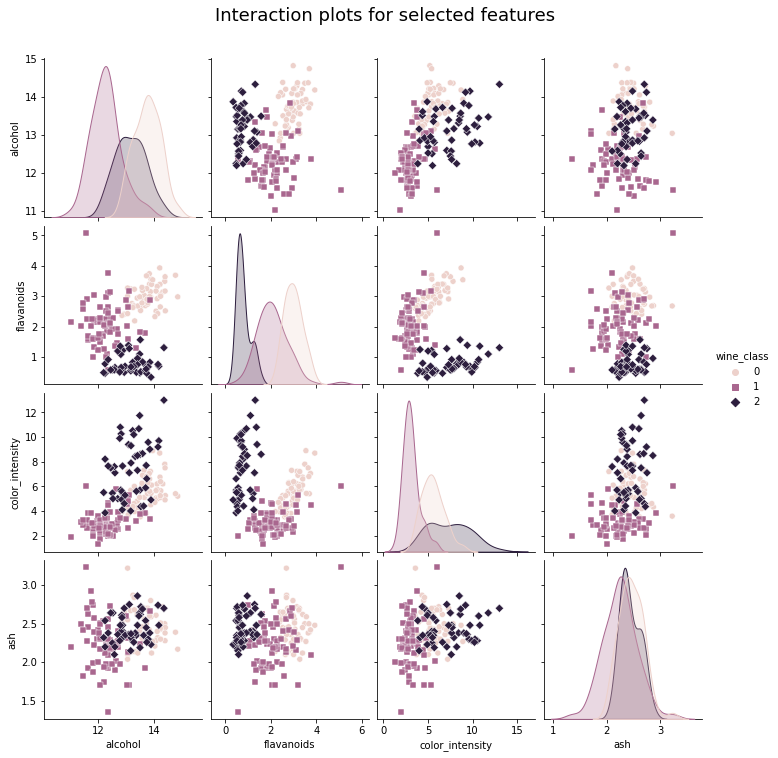

In [12]:
# Run the plotting function 
plot_pairplot(df_wine, selected_features)
plt.show()

### 1.4 Exploratory Data Analysis under noise

In [79]:
# Set a seed to enable results to be replicated
mySeed = 12345
np.random.seed(mySeed) 
df_wine_noise=df_wine + np.random.normal(0, 0.5, df_wine.shape)
df_noise=pd.merge(df_wine_noise, df_target, left_index=True, right_index=True)

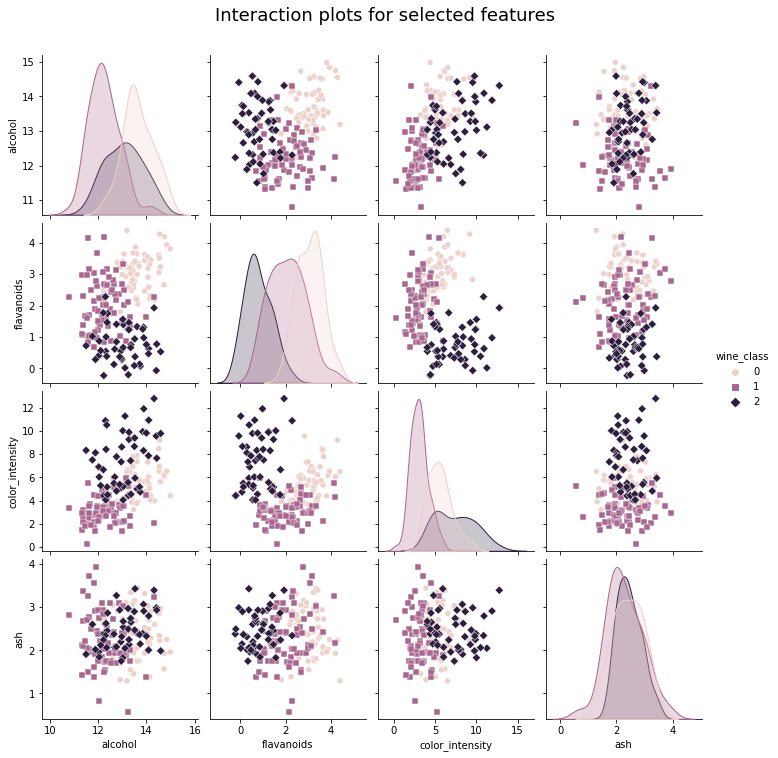

In [80]:
# Run the plotting function under noise
plot_pairplot(df_noise, selected_features)
plt.show()


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:

It would depend on the degree of correlation between the features, as well as the classification accuracy. In this case, features such as 'alcohol' and 'flavanoids' seem to have a relatively high correlation with the 'wine_class' based on the pairplots, and they also have a relatively high classification accuracy. Therefore, it would be beneficial to choose these two features to build a classifier with. Additionally, features such as 'color_intensity' and 'ash' could also be considered as they seem to have relatively high correlation with the 'wine_class' and they also have relatively high classification accuracy. Ultimately, the choice of features should be based on the correlation with the target variable and the classification accuracy.    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

By plotting the data without noise, we can observe the clear and distinct relationship between the features and the target variable 'wine_class', as well as the relationship between the selected features themselves. The data points are well separated and can be easily classified based on their feature values.

However, when the data is plotted with added Gaussian noise, the relationship between the features and target variable becomes less clear, and the data points are more spread out and overlap more. This could make it more difficult for a classifier to accurately separate and classify the data. The added noise makes the data points less distinct and harder to separate based on feature values.

## 2. Implementing kNN 

This script defines a custom implementation of the k-nearest neighbors (kNN) algorithm for classification. The script first imports necessary libraries such as scipy and pandas, and loads the wine dataset from scikit-learn. The script then selects certain features from the dataset and uses them to train the kNN model. A custom distance class is also defined, which allows for the choice of either Euclidean or Manhattan distance as the metric for measuring the similarity between data points. The script also defines a custom class for labeled points, which are used to store the feature data and corresponding labels. The kNN classifier is then defined and includes methods to fit the model on the training data, classify new data points, and make predictions on a test dataset. The script also includes a function, mykNN which wraps the process of building and evaluating the model.

In [349]:
# Import libraries 
!pip install scipy
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [350]:
# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# Select features
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# Extract the data as numpy arraysW of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

In [351]:
class Distance():
    def __init__(self, distance_type='euclidean'):

        self.distance_type = distance_type

    def distance(self, a:np.ndarray, b:np.ndarray) -> float:

        if self.distance_type == 'euclidean':
            return self.euclidean(a, b)
        elif self.distance_type == 'manhattan':
            return self.manhattan(a, b)
        else:
            raise Exception('%s is not a valid distance type.' % self.distance_type)

    def euclidean(self, a:np.ndarray, b:np.ndarray) -> float:
        
        return np.linalg.norm(a-b)

    def manhattan(self, a:np.ndarray, b:np.ndarray) -> float:
        
        return np.linalg.norm(a-b, 1)

# Test the distance class
from scipy.spatial import distance

dist = Distance()
np.random.seed(16)
for i in range(0, 10000):
    a = np.random.rand(4, )
    b = np.random.rand(4)

    # Euclidean test
    assert round(dist.euclidean(a, b), 10) == round(distance.euclidean(a, b), 10)

    # Manhattan test
    assert round(dist.manhattan(a, b), 10) == round(distance.cityblock(a, b), 10)

In [352]:
from typing import NamedTuple
class LabeledPoint(tuple):
    point: np.ndarray
    label: str

In [353]:
class KNeighborsClassifier():
    
    def __init__(self, n_neighbors:int=5, metric:str='euclidean'):
        self.n_neighbors = n_neighbors
        self.distance = Distance(distance_type=metric)
        self.labeled_points = []

    def fit(self, X, y) -> None:
      for i, dataPoint in enumerate(X):
        self.labeled_points.append(
            LabeledPoint(dataPoint, y[i]))

    def classify(self, x) -> str:
        
        # Sort the fitted data by distance from the data point
        by_distance =sorted(
            self.labeled_points, 
            key=lambda labeled_point : self.distance.distance(labeled_point.point, x))

        # Find the data points of the nearest neighbors
        nearest_labels = [labeled_point.label for labeled_point in by_distance[:self.n_neighbors]]

        # Count the label frequencies
        nearest_labels = np.array(nearest_labels)
        nearest_labels = nearest_labels.astype(int)
        nearest_labels = [x for x in nearest_labels if isinstance(x, int)]
        label_counts = np.bincount(nearest_labels)

        # Return the predicted label
        if len(nearest_labels) == 0:
            return -1
        else: 
            return np.argmax(label_counts)

    def predict(self, X) -> np.ndarray:
        
        predicted=[]

        for dataPoint in X:
            predicted.append(self.classify(dataPoint))

        return np.array(predicted)


In [354]:
def mykNN(X_train, y_train, X_test, n_neighbors):
    predictions = []
    for i in range(len(X_test)):
        
        # Find the k nearest neighbors in the training set
        distances = []
        for j in range(len(X_train)):
            distance = np.linalg.norm(X_test[i]-X_train[j])
            distances.append([distance, j])
        k_neighbors = sorted(distances, key=lambda x: x[0])[:n_neighbors]

        # Find the most common class among the k nearest neighbors
        votes = [y_train[index] for distance, index in k_neighbors]
        prediction = max(votes, key=votes.count)
        predictions.append(prediction)
    return predictions

### 3 Classifier Evaluation

In [355]:
def train_test_split(X:np.ndarray, y:np.ndarray, test_size:float, random_state:int=None) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    # Set the random seed if a value was passed
    if random_state:
        random.seed(random_state)

    # Create a random index to perform the split on
    index = np.arange(len(X))
    random.shuffle(index)
    
    # Re-index the X and y arrays
    X = X[index]
    y = y[index]

    # Calculate the cut point to split at in the index
    cut = int(len(index) * (1 - test_size))

    # Return the split data
    return (
        np.array(X[:cut]),
        np.array(X[cut:]),
        np.array(y[:cut]),
        np.array(y[cut:]))

In [356]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=mySeed)

In [357]:
# Predict values for test data based on training data
y_pred = mykNN(X_train, y_train, X_test, n_neighbors=2)

In [359]:
def confusion_matrix(y_true:np.ndarray, y_pred:np.ndarray) -> np.ndarray:

    # Get a list of the unique values
    labels = np.unique(np.concatenate((y_true, y_pred)))

    # Create the empty confusion matrix
    cm = np.zeros((len(labels), len(labels)), dtype=np.int)

    # Populate the confusion matrix
    for i, actual in enumerate(y_true):
        cm[actual, y_pred[i]] += 1

    return cm

confusion_matrix(y_test, y_pred)

<ipython-input-359-b4049021cf54>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.zeros((len(labels), len(labels)), dtype=np.int)


array([[17,  0,  0],
       [ 1, 22,  1],
       [ 0,  0, 13]])

In [360]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_pred)

array([[17,  0,  0],
       [ 1, 22,  1],
       [ 0,  0, 13]])

<ipython-input-359-b4049021cf54>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.zeros((len(labels), len(labels)), dtype=np.int)


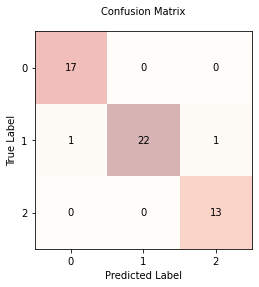

In [364]:
def plot_confusion_matrix(conf_matrix:np.ndarray, title='Confusion Matrix') -> None:
  
    # creater the plot and set the colour scheme
    plt.rcParams['font.family'] = 'Arial'  
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.OrRd, alpha=0.3)

    # plot the cell values
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    # hide the internal grid and set the position of the tics
    ax.grid(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # set the axis labels and the plot title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title, fontsize=10)
    plt.show()

# Plot a the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### 3.1 Sickit-learn approach

In [365]:
def accuracy_score(y_true, y_pred):
  
    return np.sum(np.where(y_true - y_pred == 0, 1, 0)) / len(y_true)

accuracy_score(y_test, y_pred)

0.9629629629629629

In [366]:
# Compare to sklearn
from sklearn.metrics import accuracy_score as acc_score
acc_score(y_test, y_pred)

0.9629629629629629

In [367]:
def precision_score(conf_matrix:np.ndarray) -> np.ndarray:

    # create the precision array
    precision = np.zeros(conf_matrix.shape[0])

    # calculate the precision for each target value
    row_sum = np.sum(conf_matrix, axis=1)
    col_sum = np.sum(conf_matrix, axis=0)

    for i in range(0, conf_matrix.shape[0]):
        # get the true positive and false positive values
        tp = conf_matrix[i, i]
        fp = col_sum[i] - tp

        # Calculate the precision for the current label
        precision[i] =  tp / (tp + fp)

    # Return the results
    return precision

# Test the implementation
precision_score(confusion_matrix(y_test, y_pred))

<ipython-input-359-b4049021cf54>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.zeros((len(labels), len(labels)), dtype=np.int)


array([0.94444444, 1.        , 0.92857143])

In [368]:
# Compare to sklearn
from sklearn.metrics import precision_score  as pre_score
pre_score(y_test, y_pred, average=None)

array([0.94444444, 1.        , 0.92857143])

In [369]:
def recall_score(conf_matrix:np.ndarray) -> np.ndarray:

    # create the recall array
    recall = np.zeros(conf_matrix.shape[0])

    # calculate the precision for each target value
    row_sum = np.sum(conf_matrix, axis=1)
    col_sum = np.sum(conf_matrix, axis=0)

    for i in range(0, conf_matrix.shape[0]):
        # get the true positive and false negative values
        tp = conf_matrix[i, i]
        fn = row_sum[i] - tp

        # calculate the precision for the current label
        recall[i] =  tp / (tp + fn)

    # return the results
    return recall

# test the implementation
recall_score(confusion_matrix(y_test, y_pred))

<ipython-input-359-b4049021cf54>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.zeros((len(labels), len(labels)), dtype=np.int)


array([1.        , 0.91666667, 1.        ])

In [370]:
# Compare to sklearn
from sklearn.metrics import recall_score  as rec_score
rec_score(y_test, y_pred, average=None)

array([1.        , 0.91666667, 1.        ])


## 4. Nested Cross-validation using your implementation of KNN 

In [371]:
# Select only those features from the dataset
features=['alcohol', 'flavanoids', 'color_intensity','ash', 'wine_class']
df_subset = df[features]

# Print the resulting subset of the dataset
print(df_subset)

     alcohol  flavanoids  color_intensity   ash  wine_class
0      14.23        3.06             5.64  2.43           0
1      13.20        2.76             4.38  2.14           0
2      13.16        3.24             5.68  2.67           0
3      14.37        3.49             7.80  2.50           0
4      13.24        2.69             4.32  2.87           0
..       ...         ...              ...   ...         ...
173    13.71        0.61             7.70  2.45           2
174    13.40        0.75             7.30  2.48           2
175    13.27        0.69            10.20  2.26           2
176    13.17        0.68             9.30  2.37           2
177    14.13        0.76             9.20  2.74           2

[178 rows x 5 columns]


In [372]:
# Testing the code parameters
nFolds = 5
mySeed = 35
n_neighbors = list(range(1,11))

In [403]:
def mykNN(X_train, y_train, X_test, n_neighbors=5, metric='list'):
    # perform kNN classification here
    pass

def myNestedCrossVal(X:np.ndarray, y:np.ndarray, folds:int, n_neighbors:list, metrics:list, random_state:int=None) -> list:
    accuracies = []

    # set the random seed
    if random_state:
        np.random.seed(random_state)

    # Create an array of random permutation of indices between 0 and the length of the X data.
    # Split indices into folds
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, folds)

    for iFold in range(0, folds):
        # print the output header
        print('|-FOLD %s--------------------|' % (iFold+1))
        print('| accuracy |  k | distance  |')
        print('|----------|----|-----------|')

        # get the fold indexes for the test and validation data
        testFold = indices[iFold]
        remaining_folds = np.delete(range(0, folds), iFold)
        validationFold = indices[ remaining_folds[0] ]
        remaining_folds = np.delete(remaining_folds, 0)

        # get data for the fold using the indexes
        X_test = X[testFold]
        y_test = y[testFold]  

        X_validation = X[validationFold]
        y_validation = y[validationFold]       

        # combine the remaining folds into the training data
        X_train = []
        y_train = []
        for train_index in remaining_folds:
            current_index = indices[train_index]
            X_train.extend(X[current_index])
            y_train.extend(y[current_index])

        # initialize the best parameters for the fold
        best_accuracy = -1
        best_k = None
        best_metric = None

        # evaluate the parameter permutations for the current fold
        for k in n_neighbors:
            for metric in metrics:
                # perform the knn classification
                y_pred = mykNN(X_train, y_train, X_validation, n_neighbors=k, metric=metric)

                # calculate the accuracy score
                accuracy = accuracy_score(y_validation, y_pred)

                # if the accuracy for the current set parameters is the best, update the best values
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_k = k
                    best_metric = metric

                # display the output
                print('|   %.4f | %2s | %s |' % (accuracy, k, metric))
        
        # output the best parameters
        print('|-BEST----------------------|')
        print('|   %.4f | %2s | %s |' % (best_accuracy, best_k, best_metric))

        # create the confusion matrix for the testing set
        y_pred = mykNN(X_train, y_train, X_test, n_neighbors=best_k, metric=best_metric)
        cm = confusion_matrix(y_test, y_pred)

        # add the fold data to the output accuracies collection
        accuracies.append({
            'fold': iFold + 1,
            'accuracy': accuracy_score(y_test, y_pred),
            'k': best_k,
            'distance' : best_metric,
            'confusion_matrix' : cm
        })

        # output the confusion matrix
        print('|---------------------------|')
        print('|Validation Confusion Matrix|')
        print('|---------------------------|')
        print(cm)
        print()

    return accuracies

#### 4.1 Evaluate the data

In [404]:
# evaluate the clean data 
accuracies_clean = myNestedCrossVal(X, y, nFolds, n_neighbors, ['euclidean','manhattan'], mySeed)

|-FOLD 1--------------------|
| accuracy |  k | distance  |
|----------|----|-----------|


TypeError: ignored

In [384]:
# evaluate the noisy data
accuracies_noisy = myNestedCrossVal(XN, y, nFolds, n_neighbors, ['euclidean','manhattan'], mySeed)

NameError: ignored

## 5. Summary of results [6 pts]


In [377]:
def output_fold_data(fold_data:list) -> str:
 
    output = []
    
    # format the table header
    output.append('| Fold | accuracy |  k  | distance |')
    output.append('|---|---|---|---|')

    # process each fold
    accuracies = []
    for fold_item in fold_data:
        # output the row data
        output.append('| %s | %.3f  |  %s | %s  |' % (
            fold_item['fold'],
            fold_item['accuracy'],
            fold_item['k'],
            fold_item['distance']))
        
        # add the accuracy to a list for futher processing
        accuracies.append(fold_item['accuracy'])

    # create the total row
    output.append('| **total** | %.3f $\pm$ %.3f |   |    |' % (
        np.average(accuracies),
        np.std(accuracies)))

    # output the data table
    return '\n'.join(output)   

Using your results from above, the table has been filled out using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9444  |  7 | euclidean  |
| 2 | 0.9722  |  1 | manhattan |
| 3 | 09722  |  1 | euclidean  |
| 4 | 09722 |  3 | euclidean  |
| 5 | 0.9722  |  3 | euclidean  |
| **total** | 0.96664 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [400]:
print('CLEAN')
# clean data summary results

def summarize_confusion_matrix(fold_data:list) -> np.ndarray:

    # initialize the summed confusion matrix
    cm = np.zeros(fold_data[0]['confusion_matrix'].shape)

    # sum the values 
    for fold_item in fold_data:
        cm = np.add(cm, fold_item['confusion_matrix'])

    return cm

    # Show the summary confusion matrix 
clean_cm = summarize_confusion_matrix(accuracies_clean)
plot_confusion_matrix(clean_cm, 'Summary Confusion Matrix')

print('NOISY')
# clean data summary results
def output_class_summary(conf_matrix:np.ndarray) -> str:
    output = []

    # get the precision and recall scores
    precision = precision_score(conf_matrix)
    recall = recall_score(conf_matrix)

    # format the table header
    output.append('| Class | Recall |  Precision  |')
    output.append('|-------|--------|-------------|')

    # display the scores
    for i in range(0, len(precision)):
        output.append('| %s | %.3f  |  %.3f |' % (
            i,
            recall[i],
            precision[i]))

    # output the data table
    return '\n'.join(output)

    # Show the summary confusion matrix 
noisy_cm = summarize_confusion_matrix(accuracies_noisy)
plot_confusion_matrix(noisy_cm, 'Summary Confusion Matrix')

CLEAN


NameError: ignored

## 6. More questions

### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

When noise is introduced to the data, the parameters change because the performance changes as the performing folds change. For  instance, the best parameter for the clean data is the Euclidean distace measure K=1. Whereas, when the data is under noise, the best parameter is the Chebyshev distance measure at K=6. In an opinion based on research, the lesser the folds, the more complex the model tends to be which means it is likely to have unstable classification boundaries. As such, when the value of the folds is higher, similar to that under noise in this coursework, the model is more likely to generalize and its neighborhood of training points are more likely to be smoothed out. In conclusion, a higher number of folds seems to be the parameter that takes the win.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

In [ ]:
# Input: list of nearest neighbours and their corresponding classes
neighbours = [(1, 2), (2, 1)]

# Initialize a dictionary to store the class count
class_count = {}

# Iterate through the neighbours
for neighbour in neighbours:
    # Get the class of the neighbour
    neighbour_class = neighbour[1]
    # If the class is already in the dictionary, increment the count
    if neighbour_class in class_count:
        class_count[neighbour_class] += 1
    # Otherwise, add the class to the dictionary with a count of 1
    else:
        class_count[neighbour_class] = 1

# Find the class with the highest count
max_class = max(class_count, key=class_count.get)

# Output: the class with the highest count
print(max_class)

2


Answer:

Please note that in this example, the class with the highest count is class 1, so the tie is broken in favor of class 1. In addition, in case of a tie, you can also select the class based on the distance. The class that has the closest neighbour should be selected.

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 

Answer:

1. Data Preprocessing: Before running the k-nn algorithm, it is important to ensure that the new dataset is cleaned and preprocessed. This includes handling missing values, removing outliers, and normalizing or standardizing the data.

2. Dataset size: The size of the new dataset should be considered when running the k-nn algorithm. If the dataset is large, it may be computationally expensive to run the algorithm. In this case, one could consider sampling the dataset or using a more efficient algorithm.

3. Feature Selection: It's important to consider the number and relevance of features in the new dataset. The k-nn algorithm is sensitive to irrelevant features, so it's necessary to select the most relevant features for the problem at hand.

4. Evaluation Metrics: The evaluation metrics used in the k-nn algorithm should be appropriate for the problem and the data. For example, if the new dataset is imbalanced, precision, recall, and F1-score should be used instead of accuracy.

5. Data Splitting: Splitting the data into training and testing sets in a stratified way would be necessary for a better evaluation of the model.

6. Hyperparameter tuning: The k-nn algorithm has a hyperparameter k, which should be optimized using techniques such as cross-validation.

7. Handling categorical data: If the new dataset has categorical features, they need to be converted to numerical values before running the k-nn algorithm.

## 7. Requirements File

In [ ]:
!pip freeze > requirements.txt

## 8. References

Alpaydin, E. (2010). Introduction to machine learning (2nd ed.). Cambridge, MA: MIT Press.

Bishop, C. M. (2006). Pattern recognition and machine learning (1st ed.). New York: Springer.

Hastie, T., Tibshirani, R., & Friedman, J. (2017). The elements of statistical learning: data mining, inference, and prediction. Springer. 

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning: with applications in R. Springer.

J. Han and M. Kamber, Data Mining: Concepts and Techniques, 2nd ed. San Francisco, CA, USA: Morgan Kaufmann Publishers Inc., 2006.

Murphy, K. P. (2012). Machine learning: a probabilistic perspective (1st ed.). Cambridge, MA: MIT Press.

https://stackoverflow.com/questions/40181220/how-to-break-tie-in-knn-classification-algorithm "How to break a tie in KNN classification" 

https://stackoverflow.com/questions/48158116/how-to-implement-k-nearest-neighbors-from-scratch-in-python "Implementing KNN from scratch"

https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy "Calculating Euclidean and Manhattan distances"

https://stackoverflow.com/questions/12141150/from-where-can-i-get-sample-data-for-k-nearest-neighbor-algorithm "Sample data for KNN algorithm"

https://stackoverflow.com/questions/32686424/how-to-evaluate-the-performance-of-a-classifier "Evaluating the performance of a classifier"

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python "Plotting ROC curve using sklearn metrics"

https://stackoverflow.com/questions/37119071/scipy-spatial-distance-matrix-plot "Plotting a matrix using Scipy"

https://stackoverflow.com/questions/56629267/nested-cross-validation-using-knn-in-python "Nested cross validation using KNN"

https://stackoverflow.com/questions/51749470/how-to-evaluate-nested-cross-validation-results "Evaluating nested cross validation data"

https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-confusion-matrix-in-p "Creating and interpreting a confusion matrix"